# Stochastic D%

FF-9 Stochastic D%

This notebook compute the features listed here:  
https://docs.google.com/spreadsheets/d/1Qkh-3fxaNFeh_741QCA10vgCA9-vex1RbzJa81tldwQ/edit#gid=1163800167 

the Stochastic Oscillator is used for three things; Identifying overbought and oversold levels, spotting divergences and also identifying bull and bear set ups or signals. https://www.tradingview.com/support/solutions/43000502332-stochastic-stoch/
See the calculation details.

Stochastic D%
https://hexdocs.pm/talib/TAlib.Indicators.Stochastic.html


Stochastic Oscillator Wikipedia
```
%K = (Current Close - Lowest Low)/(Highest High - Lowest Low) * 100

%D = 3-day SMA of %K

Lowest Low = lowest low for the look-back period

Highest High = highest high for the look-back period

%K is multiplied by 100 to move the decimal point two places
```


```
stochastic_k(prices, period \\ 14)
%K = (Current Close - Lowest Low)/(Highest High - Lowest Low) * 100```

Our API  
https://mrjbq7.github.io/ta-lib/func_groups/momentum_indicators.html
```
STOCH - Stochastic

slowk, slowd = STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
```

How stochastic osillator works?

https://www.investopedia.com/ask/answers/05/062405.asp



TA-Lib documentation:  https://ta-lib.org/  
ta_func/ta_STOCH.c  
```
/*
 * TA_STOCH - Stochastic
 * 
 * Input  = High, Low, Close
 * Output = double, double
 * 
 * Optional Parameters
 * -------------------
 * optInFastK_Period:(From 1 to 100000)
 *    Time period for building the Fast-K line
 * 
 * optInSlowK_Period:(From 1 to 100000)
 *    Smoothing for making the Slow-K line. Usually set to 3
 * 
 * optInSlowK_MAType:
 *    Type of Moving Average for Slow-K
 * 
 * optInSlowD_Period:(From 1 to 100000)
 *    Smoothing for making the Slow-D line
 * 
 * optInSlowD_MAType:
 *    Type of Moving Average for Slow-D
 
 
Line: 319-347
    /* With stochastic, there is a total of 4 different lines that
    * are defined: FASTK, FASTD, SLOWK and SLOWD.
    *
    * The D is the signal line usually drawn over its
    * corresponding K function.
    *
    *                    (Today's Close - LowestLow)
    *  FASTK(Kperiod) =  --------------------------- * 100
    *                     (HighestHigh - LowestLow)
    *   
    *  FASTD(FastDperiod, MA type) = MA Smoothed FASTK over FastDperiod
    * 
    *  SLOWK(SlowKperiod, MA type) = MA Smoothed FASTK over SlowKperiod
    *
    *  SLOWD(SlowDperiod, MA Type) = MA Smoothed SLOWK over SlowDperiod
    *
    * The HighestHigh and LowestLow are the extreme values among the
    * last 'Kperiod'.
    *  
    * SLOWK and FASTD are equivalent when using the same period.
    *
    * The following shows how these four lines are made available in TA-LIB:
    *
    *  TA_STOCH  : Returns the SLOWK and SLOWD
    *  TA_STOCHF : Returns the FASTK and FASTD
    *
    * The TA_STOCH function correspond to the more widely implemented version
    * found in many software/charting package. The TA_STOCHF is more rarely
    * used because its higher volatility cause often whipsaws.
    
Line: 371-378
   /* Do the K calculation:
    *
    *    Kt = 100 x ((Ct-Lt)/(Ht-Lt))
    *
    * Kt is today stochastic
    * Ct is today closing price.
    * Lt is the lowest price of the last K Period (including today)
    * Ht is the highest price of the last K Period (including today)

Line: 512-523
   /* Calculate the %D which is simply a moving average of
    * the already smoothed %K.
    */
 ```

In [2]:
import talib
from talib.abstract import *
import numpy as np
import pandas as pd
import datetime as dt
import os, os.path

# 1. https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
# 2. https://stackoverflow.com/questions/42379818/correct-way-to-set-new-column-in-pandas-dataframe-to-avoid-settingwithcopywarnin
pd.options.mode.chained_assignment = None # Suppress warning

# Load Data Series from Dataset

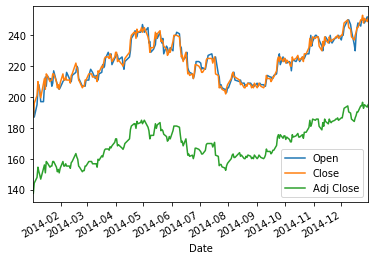

In [3]:
DATA_HOME = os.path.join("..","..","dataset","historical")

symbols = ["ADVANC","BTS"]
data = {}
for s in symbols:
    data[s] = pd.read_csv(os.path.join(DATA_HOME,"%s.csv" % s), index_col=0)

df = data["ADVANC"]
df.index = pd.to_datetime(df.index)

period_start='2014-01-01'
period_end='2014-12-31'

daily = df[period_start:period_end]
daily[['Open','Close','Adj Close']].plot()

# Stochastic K%

Momentum indicator over a particular period ... Indicate overbought or oversold.

In [8]:
inputs = {
    'open': daily["Open"],
    'high': daily["High"],
    'low': daily["Low"],
    'close': daily["Close"],
    'volume': daily["Volume"]
}
# Note the use of Close instead of Adj Close.

n = 10
# mom_t10 = MOM(inputs, timeperiod=n)


# STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

# See documentation in C code from the 
slowk, slowd = STOCH(inputs, fastk_period=10, prices=['high', 'low', 'close']) # No need for period.!! Check out the C documentation.

# daily.loc[:,("MOM-10")] = mom_t10.tolist()
daily.loc[:,("Stoch-K")] = slowk.tolist()
daily.loc[:,("Stoch-D")] = slowd.tolist()
daily.tail()



,High,Low,Open,Close,Volume,Adj Close,Stoch-K,Stoch-D
Date,,,,,,,,
2014-12-24,253.0,249.0,250.0,253.0,3076400.0,196.590500,93.217893,88.051948
2014-12-25,252.0,246.0,251.0,248.0,1773800.0,192.705292,89.523810,89.947090
2014-12-26,251.0,246.0,248.0,251.0,2452700.0,195.036407,90.476190,91.072631
2014-12-29,253.0,248.0,252.0,249.0,2282500.0,193.482346,85.255732,88.418577
2014-12-30,252.0,247.0,249.0,251.0,2302600.0,195.036407,83.827160,86.519694


# Plot of SMA on the original time-series

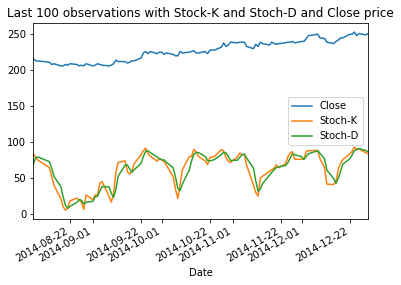

In [9]:
daily[['Close','Stoch-K','Stoch-D']][-100:].plot(title="Last 100 observations with Stock-K and Stoch-D and Close price")

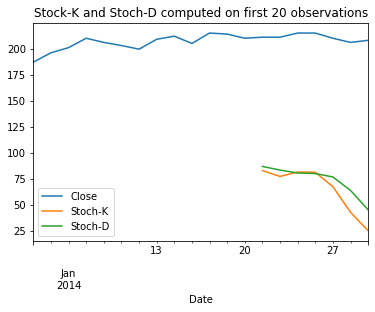

In [10]:
daily[['Close','Stoch-K','Stoch-D']][:20].plot(title="Stock-K and Stoch-D computed on first 20 observations")

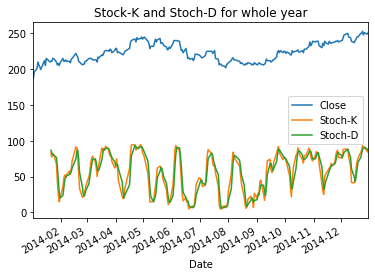

In [11]:
daily[['Close','Stoch-K','Stoch-D']].plot(title="Stock-K and Stoch-D for whole year")